<a href="https://colab.research.google.com/github/vinothini-28/Machine-learning/blob/main/irisdatsetusingclassificationmodel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Iris dataset**
# using machine learning classification models and their evaluation metrics using scikit learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

loading of dataset -

---


iris
Features and Labels Separation

.data: This attribute contains the feature matrix of the dataset. Each row
represents an individual sample, and each column represents a feature or attribute of the sample. For instance, in the Iris dataset, iris.data includes measurements such as sepal length, sepal width, petal length, and petal width for each iris flower.
Usage Example: X = iris.data assigns the feature matrix to variable X, which is used as input for training machine learning models.

.target: This attribute contains the target labels or outcomes associated with each sample. In classification tasks, target contains the class labels; in regression tasks, it contains the numerical values to predict. For example, in the Iris dataset, iris.target includes the species of each iris flower.
Usage Example: y = iris.target assigns the target labels to variable y, which is used as the output variable during model training and evaluation.

In [4]:
iris=load_iris()
X=iris.data
Y=iris.target

In [5]:
df=pd.DataFrame(X)
df.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
df["species"]=Y
df.head()

,0,1,2,3,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df['species'].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   0        150 non-null    float64
 1   1        150 non-null    float64
 2   2        150 non-null    float64
 3   3        150 non-null    float64
 4   species  150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


since the data are already in numerical form and no null values the preprocessing method is finished
# model traning

In [13]:
#splitting of dataset into training and testing
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [14]:
#decision tree model
decisionmodel=DecisionTreeClassifier()
decisionmodel.fit(X_train,Y_train)

DecisionTreeClassifier()

In [15]:
#random forest classifier
randommodel=RandomForestClassifier()
randommodel.fit(X_train,Y_train)


RandomForestClassifier()

In [16]:
#support vector classifier
svcmodel=SVC()
svcmodel.fit(X_train,Y_train)

SVC()

Predict the model

In [19]:
#predict the models

decision_pred=decisionmodel.predict(X_test)
random_pred=randommodel.predict(X_test)
svc_pred=svcmodel.predict(X_test)


Evaluation of the models

In [20]:
# Calculate accuracy for each model
decision_accuracy = accuracy_score(Y_test, decision_pred)
random_accuracy = accuracy_score(Y_test, random_pred)
svc_accuracy = accuracy_score(Y_test, svc_pred)

# Accuracy data of various models in a dictionary
accuracy_data = {
    "DecisionTree": decision_accuracy,
    "RandomForest": random_accuracy,
    "SVC": svc_accuracy
}

# Print the accuracy of each model
print("Model Accuracy:")
for model, data in accuracy_data.items():
    print(f"{model}: {data:.2f}")

Model Accuracy:
DecisionTree: 1.00
RandomForest: 1.00
SVC: 1.00


In [23]:
# Generate classification reports
decision_report = classification_report(Y_test, decision_pred, target_names=iris.target_names)
random_report = classification_report(Y_test, random_pred, target_names=iris.target_names)
svc_report = classification_report(Y_test, svc_pred, target_names=iris.target_names)

print("Decision Tree Classification Report:\n", decision_report)
print("Random Forest Classification Report:\n", random_report)
print("SVC Classification Report:\n", svc_report)


Decision Tree Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Random Forest Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

SVC Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00  

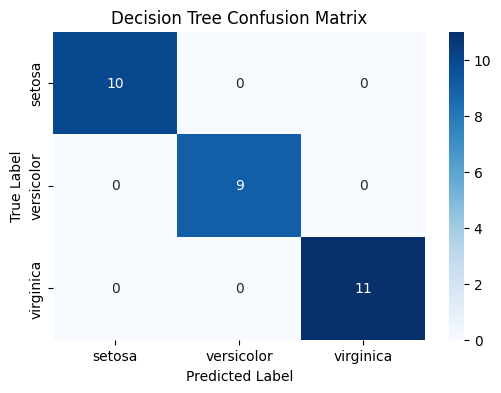

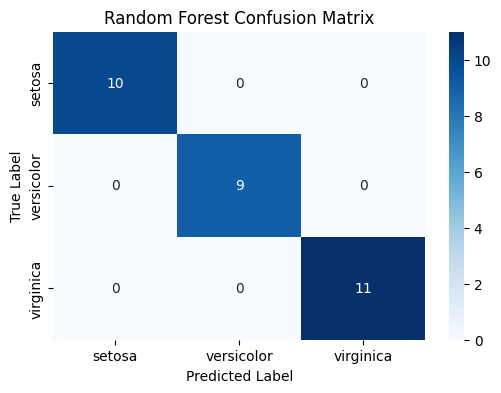

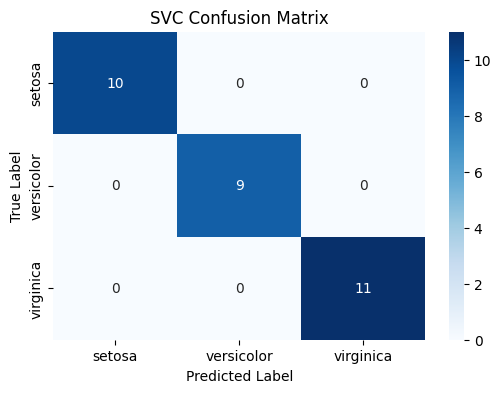

In [27]:
import matplotlib.pyplot as plt  # Correct import for matplotlib.pyplot
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Compute confusion matrices
decision_cm = confusion_matrix(Y_test, decision_pred)
random_cm = confusion_matrix(Y_test, random_pred)
svc_cm = confusion_matrix(Y_test, svc_pred)

# Plot confusion matrices
def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title(title)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

plot_confusion_matrix(decision_cm, title='Decision Tree Confusion Matrix')
plot_confusion_matrix(random_cm, title='Random Forest Confusion Matrix')
plot_confusion_matrix(svc_cm, title='SVC Confusion Matrix')
